Import the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Import the House Price dataset


In [10]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing)


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [12]:
housing_dataframe= pd.DataFrame(housing.data)

In [14]:
housing_dataframe.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
housing_dataframe['price']=housing.target
housing_dataframe.head()

,0,1,2,3,4,5,6,7,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
housing_dataframe.shape

(20640, 9)

In [20]:
housing_dataframe.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
price    0
dtype: int64

In [22]:
housing_dataframe.describe()

,0,1,2,3,4,5,6,7,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the correlation between the various features in the dataset.

1.Positive Correlation

2.Negative Correlation

In [24]:
correlation = housing_dataframe.corr()

#fmt='.1f' means the values display 1 value after decimal point
#annot means nothing but the features name


ValueError: ignored

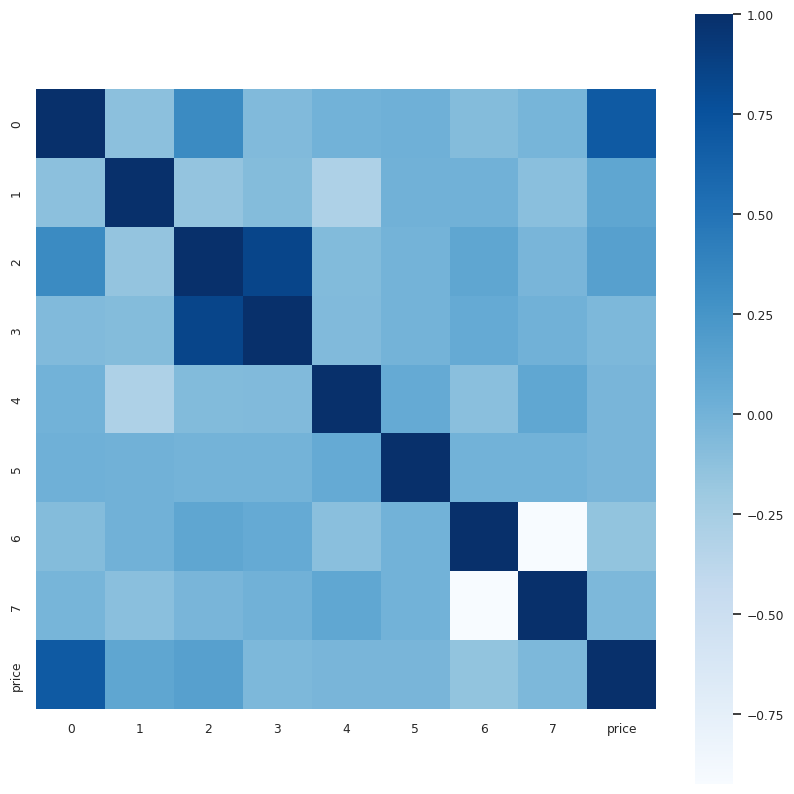

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.lf', annot =True, annot_kws={'size':8},cmap='Blues')
plt.show()

In [34]:
x=housing_dataframe.drop(['price'], axis=1)
y=housing_dataframe['price']
print(x)
print(y)

            0     1         2         3       4         5      6       7
0      8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23
1      8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22
2      7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24
3      5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25
4      3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25
...       ...   ...       ...       ...     ...       ...    ...     ...
20635  1.5603  25.0  5.045455  1.133333   845.0  2.560606  39.48 -121.09
20636  2.5568  18.0  6.114035  1.315789   356.0  3.122807  39.49 -121.21
20637  1.7000  17.0  5.205543  1.120092  1007.0  2.325635  39.43 -121.22
20638  1.8672  18.0  5.329513  1.171920   741.0  2.123209  39.43 -121.32
20639  2.3886  16.0  5.254717  1.162264  1387.0  2.616981  39.37 -121.24

[20640 rows x 8 columns]
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635   

Split the data into Training and Testing data


In [36]:
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,xtr.shape,xte.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Training


XGBoost Regressor

In [37]:
model=XGBRegressor()

In [38]:
model.fit(xtr,ytr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Prediction on the Training Dataset


In [39]:
training_data_prediction=model.predict(xtr)
print(training_data_prediction)

[0.6893792  2.986824   0.48874274 ... 1.8632544  1.7800125  0.7565893 ]


In [44]:
score_1=metrics.r2_score(ytr,training_data_prediction)
score_2=metrics.mean_absolute_error(ytr,training_data_prediction)
print("R squared error:",score_1)
print("mean absolute error:",score_2)



R squared error: 0.9451221492760822
mean absolute error: 0.1919170860794262


Prediction on the Test Dataset


In [45]:
test_data_prediction=model.predict(xte)
score_1=metrics.r2_score(yte,test_data_prediction)
score_2=metrics.mean_absolute_error(yte,test_data_prediction)
print("R squared error:",score_1)
print("mean absolute error:",score_2)

R squared error: 0.8412904408180302
mean absolute error: 0.30753655785801337


Visualize the data


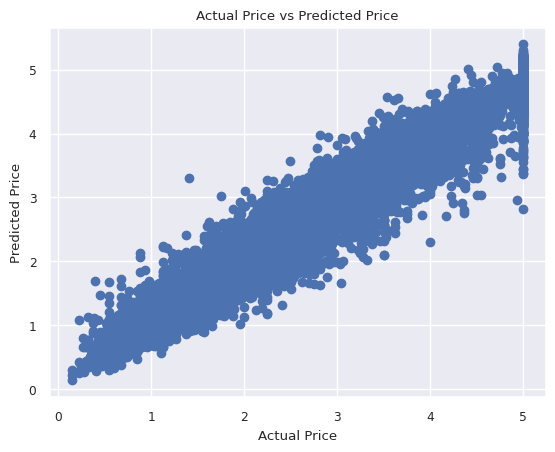

In [46]:
plt.scatter(ytr,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()